# Exoplanets: Intertiors & Atmospheres, Leiden University, Fall 2020
# Lab Assignment 1: Modelling sub-neptune mass planets interior.
# Auke Bruinsma, s1594443.

### This notebook will read in the data generated by MESA and convert it to numpy arrays.
### It will work with the history files in the LOGS folder.

#### Some comments before beginning witht the code:
The data needed to simulated the planets come from two seperate sets of files:
1. The profile.data files which are overwritten for each MESA simulation, referred to in the code as p_files.
2. The history log files which are not overwritten, referred to in the code as h_files.

Some of the plots are made with the p_files and some with the h_files.

In [145]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [146]:
# Path to your LOGS folder.
PATH = '/home/auke/Desktop/temp/Lab1/LOGS'

In [147]:
# Function to make sure strings are ordered as 1,2,3,... and not 1,10,100,101,...
def natural_string_sort(arr, b1, b2):
    def check_if_int(var):
        try:
            int(var)
            return True
        except ValueError:
            return False
        
    arr_sort = []
    l = 0
    
    for i in range(len(arr)):
        for j in range(len(arr)):
            value = arr[j][b1:b2]
            int_bool = check_if_int(value)
            if int_bool:
                if int(arr[j][b1:b2]) == l+1:
                    arr_sort.append(arr[j])
            else:
                if int(arr[j][b1:b2-1]) == l+1:
                    arr_sort.append(arr[j])
            
        l += 1
        
    return arr_sort

In [148]:
def create_h_file_list(path):
    # In here the filelist will be stored.
    files = []

    # Make an array that contains all the history files.
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path, i)) and 'history' in i: # Include all files in the folder that ...
            files.append(path + '/' + i) # ... contain the word history in it.

    files = sorted(files) # Sort the array.

    for i in range(len(files)):
        #print(files[i]) # <--- Toggle on to see if it works as intended.
        pass
    
    return files

In [149]:
def create_p_file_list(path):
    # List of directories:
    dirs = []
    final_file_list = []
    
    for i in os.listdir(path):
        if os.path.isdir(path + '/' + i):
            dirs.append(path + '/' + i)
            
    for i in dirs:
        file_list = []
        files = os.listdir(i)
        for j in files:
            if 'data' in j:
                file_list.append(j)
                
        file_list = natural_string_sort(file_list, 7, -5)          
        final_file_list.append(i + '/' + file_list[-1]) # Only take the last profile file.
    
    return final_file_list

In [150]:
# Divide file array up in 5 arrays, each for one subtask of the assignment.
def divide_h_files(files):
    files_1a = []; files_1b = []; files_1c = []; files_1d = []; files_1e = []
    
    for i in files:
        if '1a' in i: files_1a.append(i)
        if '1b' in i: files_1b.append(i)
        if '1c' in i: files_1c.append(i)
        if '1d' in i: files_1d.append(i)
        if '1e' in i: files_1e.append(i)
            
    return files_1a, files_1b, files_1c, files_1d, files_1e

In [151]:
def read_in_data_file(path):
    # First import the first part of the .data file, which is the global data.
    global_data = pd.read_csv(path, delim_whitespace=True, engine='python', nrows=3) # Read in first 3 rows.
    global_data.columns = global_data.iloc[0] # Use the second row as header.
    global_data = global_data.drop(global_data.index[0]) # Delete first row that only contains row numbers.

    # Secondly, import the time data, which is done less devious.
    time_data = pd.read_csv(path, delim_whitespace=True, engine='python', skiprows=5, header=0)
    
    return global_data, time_data

In [152]:
# Create the filelist.
h_files = create_h_file_list(PATH)
p_files = create_p_file_list(PATH)

In [153]:
# Divide and sort files
h_files_1a, h_files_1b, h_files_1c, h_files_1d, h_files_1e = divide_h_files(h_files)

## Plot 1: The evolution of the radius of each planet over time

In [154]:
# Global figure variables
figure_size = (16,10)
fontsize_title = 20
fontsize_axis = 18

labels = [
    r'$M = 10M_\oplus$, $f = 0.01$', r'$M = 10M_\oplus$, $f = 0.1$',
   r'$M = 12M_\oplus$, $f = 0.01$', r'$M = 12M_\oplus$, $f = 0.1$',
   r'$M = 3M_\oplus$, $f = 0.01$', r'$M = 3M_\oplus$, $f = 0.1$',
   r'$M = 5M_\oplus$, $f = 0.01$', r'$M = 5M_\oplus$, $f = 0.1$',
   r'$M = 7M_\oplus$, $f = 0.01$', r'$M = 7M_\oplus$, $f = 0.1$'
]

labels_2 = [
        r'$M = 7\oplus$, $f = 0.01$', r'$M = 3M_\oplus$, $f = 0.01$',
        r'$M = 10M_\oplus$, $f = 0.1$', r'$M = 5M_\oplus$, $f = 0.1$',
        r'$M = 12M_\oplus$, $f = 0.01$', r'$M = 5M_\oplus$, $f = 0.01$',
        r'$M = 12M_\oplus$, $f = 0.1$', r'$M = 3M_\oplus$, $f = 0.1$',
        r'$M = 7M_\oplus$, $f = 0.1$', r'$M = 10M_\oplus$, $f = 0.01$'
]

labels_3 = [
        r'$M = 7M\oplus$', r'$M = 3M_\oplus$',
        r'$M = 10M_\oplus$', r'$M = 5M_\oplus$',
        r'$M = 12M_\oplus$'
]

color_arr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

color_arr_2 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
             '#d62728', '#9467bd', '#ff7f0e', '#1f77b4', '#2ca02c']

color_arr_3 = ['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e', '#2ca02c', 
             '#2ca02c', '#d62728', '#d62728', '#9467bd', '#9467bd']

linestyle_arr = ['--','-','--','-','--','-','--','-','--','-']
linestyle_arr_2 = ['-','-','--','--','-','-','--','--','--','-']
linestyle_arr_3 = ['dotted','dotted','dashdot','dashdot','dotted','dotted','dashdot','dashdot','dashdot','dotted']

size_arr = [3,1,3,1,3,1,3,1,3,1]

radius_arr = [0.01833441106849181, 0.015110504460257104,
                0.029166626594592456, 0.0255491562134098,
                0.02084398164386082, 0.016955844218713316, 
                0.030238917778844056, 0.02332411431546998,
                0.02721577514649684, 0.01995244960432906]

adia = r'$\nabla_{ad}$'
rad = r'$\nabla_{rad}$'

sns.set_style('darkgrid', {'legend.frameon':True})

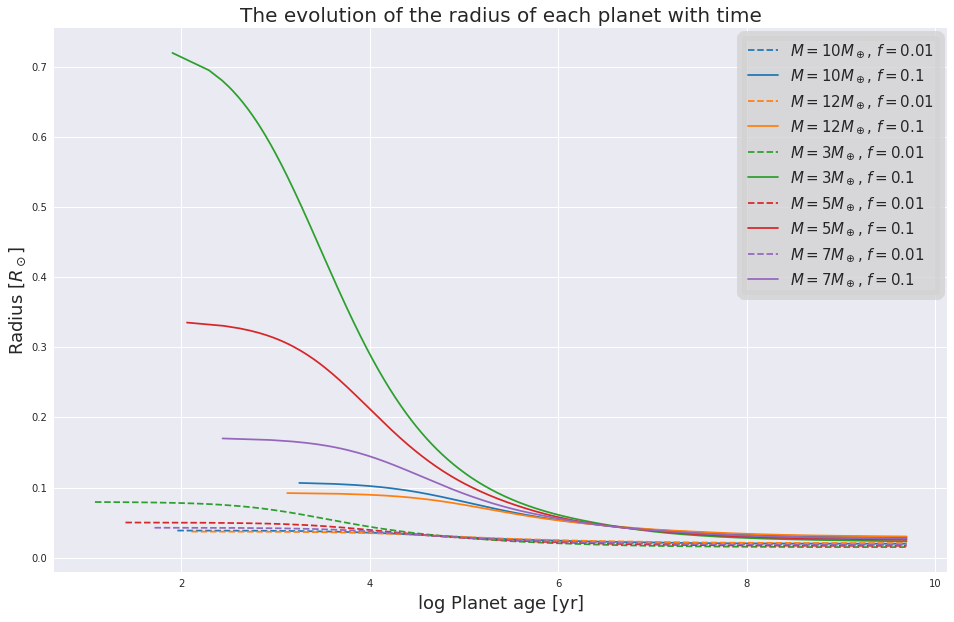

In [155]:
plt.figure(figsize=(figure_size))

for i in range(len(h_files_1e)):
    #print(h_files_1e[i])
    global_data, time_data = read_in_data_file(h_files_1e[i])
    s = int(len(time_data['log_star_age'])/2) # Apparently the data is duplified.
    plt.plot(time_data['log_star_age'].iloc[0:s], time_data['radius'].iloc[0:s], 
             c=color_arr_3[i], linestyle=linestyle_arr[i], label=labels[i])
    #print(i[-17:], time_data['radius'].iloc[-1])
    
legend = plt.legend(prop={'size': 15})
frame = legend.get_frame()
frame.set_color('lightgray')
frame.set_linewidth(10)
plt.title('The evolution of the radius of each planet with time', fontsize = fontsize_title)
plt.xlabel(r'$\log$ Planet age [yr]', fontsize = fontsize_axis)
plt.ylabel('Radius [$R_\odot$]', fontsize = fontsize_axis)
plt.savefig('fig1.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Plot 2: Final mass vs. the final radius.

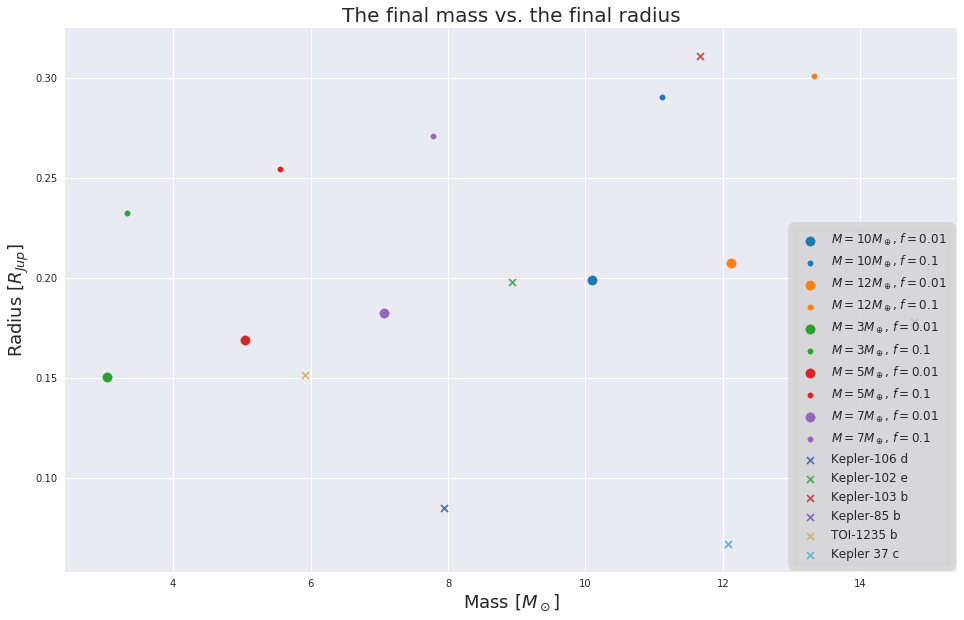

In [156]:
plt.figure(figsize=(figure_size))

# Global constants.
M_earth = 5.9764e27 # Earth mass (g)
M_sun = 1.9892e33 # Sun mass (g)
R_earth = 6.37e8 # Earth radius (cm)
R_sun = 6.9598e10 # Sun radius (cm)
R_jup = 6.9911e9 # Jupiter radius (cm)

for i in range(len(h_files_1e)):
    global_data, time_data = read_in_data_file(h_files_1e[i])
    plt.scatter(time_data['star_mass'].iloc[-1] * M_sun / M_earth, time_data['radius'].iloc[-1] * R_sun / R_jup, 
                c=color_arr_3[i], s=size_arr[i]*30, label=labels[i])

exoplanet_arr = [
    ['Kepler-106 d', 7.94575, 0.085],
    ['Kepler-102 e', 8.931023, 0.198],
    ['Kepler-103 b', 11.6707176, 0.310976],
    ['Kepler-85 b', 14.779095, 0.178],
    ['TOI-1235 b', 5.911638, 0.15113],
    ['Kepler 37 c', 12.07754, 0.067]
]

for i in range(len(exoplanet_arr)):
    plt.scatter(exoplanet_arr[i][1], exoplanet_arr[i][2], marker = 'x', label = f'{exoplanet_arr[i][0]}')
    
legend = plt.legend(loc=4, prop={'size': 12})
frame = legend.get_frame()
frame.set_color('lightgray')
frame.set_linewidth(10)
plt.title('The final mass vs. the final radius', fontsize = fontsize_title)
plt.xlabel(r'Mass [$M_\odot$]', fontsize = fontsize_axis)
plt.ylabel(r'Radius [$R_{Jup}$]', fontsize = fontsize_axis)
plt.savefig('fig2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Plot 3: Final radiative gradient and the adiabatic gradient  vs. the radius. 

/home/auke/Desktop/temp/Lab1/LOGS/7ME_0.01_9.0/profile7.data
/home/auke/Desktop/temp/Lab1/LOGS/3ME_0.01_9.0/profile9.data
/home/auke/Desktop/temp/Lab1/LOGS/10ME_0.1_9.0/profile7.data
/home/auke/Desktop/temp/Lab1/LOGS/5ME_0.1_9.0/profile10.data
/home/auke/Desktop/temp/Lab1/LOGS/12ME_0.01_9.0/profile6.data
/home/auke/Desktop/temp/Lab1/LOGS/5ME_0.01_9.0/profile7.data
/home/auke/Desktop/temp/Lab1/LOGS/12ME_0.1_9.0/profile7.data
/home/auke/Desktop/temp/Lab1/LOGS/3ME_0.1_9.0/profile14.data
/home/auke/Desktop/temp/Lab1/LOGS/7ME_0.1_9.0/profile8.data
/home/auke/Desktop/temp/Lab1/LOGS/10ME_0.01_9.0/profile6.data


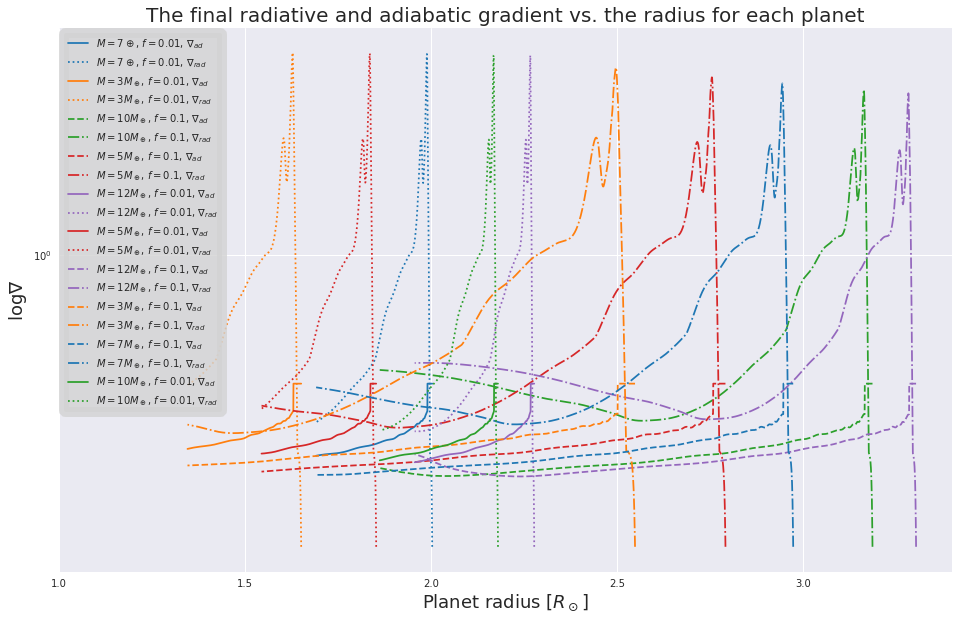

In [157]:
plt.figure(figsize=(figure_size))

for i in range(len(p_files)):
    print(p_files[i])
    global_data, time_data = read_in_data_file(p_files[i])
    plt.plot(time_data['radius_cm'] / R_earth, time_data['grada'], 
             c = color_arr_2[i], linestyle=linestyle_arr_2[i], label = f'{labels_2[i]}, {adia}')
    plt.plot(time_data['radius_cm'] / R_earth, time_data['gradr'], 
             c = color_arr_2[i], linestyle=linestyle_arr_3[i], label = f'{labels_2[i]}, {rad}')
    #print(p_files[i])
    #plt.scatter(time_data['radius_cm'].iloc[-1] / R_earth, time_data['grada'].iloc[-1], c = color_arr[i], label = f'{labels_2[i]}, {adia}')
    #plt.scatter(time_data['radius_cm'].iloc[-1] / R_earth, time_data['gradr'].iloc[-1], marker = 'x', c = color_arr[i], label = f'{labels_2[i]}, {rad}')
    #if i < 5:
    #    plt.scatter(radius_arr[i] * R_sun / R_earth, time_data['grada'].iloc[-1], 
    #                c = color_arr_2[i], label = f'{labels_3[i]}')
    #plt.scatter(radius_arr[i] * R_sun / R_earth, time_data['grada'].iloc[-1], c = color_arr_2[i])
    #plt.scatter(radius_arr[i] * R_sun / R_earth, time_data['gradr'].iloc[-1], 
    #            marker = 'x', c = color_arr_2[i])#, label = f'{labels_2[i]}, {rad}')

legend = plt.legend(loc = 'upper left')
frame = legend.get_frame()
frame.set_color('lightgray')
frame.set_linewidth(10)

plt.title('The final radiative and adiabatic gradient vs. the radius for each planet', fontsize = fontsize_title)
plt.xlabel(r'Planet radius [$R_\odot$]', fontsize = fontsize_axis)
plt.ylabel(r'$\log \nabla$', fontsize = fontsize_axis)

plt.yscale('log')

#plt.vlines(x=2.4, ymin=0.2, ymax=0.5, linestyle='--')
#plt.hlines(y=0.27, xmin=1.5, xmax=3.5, linestyle='--')

#plt.text(x=2, y=0.45, s=r'$f_{env} = 0.01$', fontsize = 14)
#plt.text(x=2.75, y=0.45, s=r'$f_{env} = 0.1$', fontsize = 14)
#plt.text(x=3, y=0.285, s=r'$\nabla_{rad}$', fontsize = 14)
#plt.text(x=3, y=0.25, s=r'$\nabla_{ad}$', fontsize = 14)

#plt.xlim(1.5, 3.5)
plt.xlim(1, 3.4)
#plt.ylim(0.2, 0.5)

#plt.grid()
plt.savefig('fig3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Plot 4: Final temperature as a function of pressure for all planets.

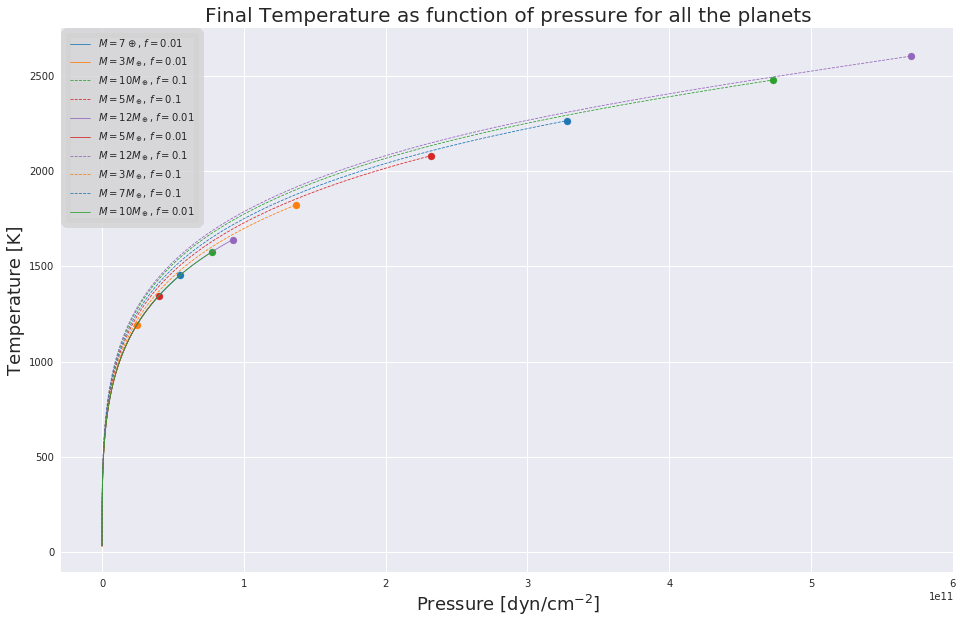

In [158]:
plt.figure(figsize=(figure_size))

for i in range(len(p_files)):
    global_data, time_data = read_in_data_file(p_files[i])
    plt.scatter(time_data['pressure'].iloc[-1], time_data['temperature'].iloc[-1], c = color_arr_2[i])
    plt.plot(time_data['pressure'], time_data['temperature'], lw=0.8, 
             linestyle = linestyle_arr_2[i], c = color_arr_2[i], label = f'{labels_2[i]}')
    
legend = plt.legend()
frame = legend.get_frame()
frame.set_color('lightgray')
frame.set_linewidth(10)

plt.title('Final Temperature as function of pressure for all the planets', fontsize = fontsize_title)
plt.xlabel(r'Pressure [dyn/cm$^{-2}$]', fontsize = fontsize_axis)
plt.ylabel('Temperature [K]', fontsize = fontsize_axis)
#plt.gca().invert_xaxis()
plt.savefig('fig4.png', dpi = 300, bbox_inches = 'tight')
plt.show()    